# EXPLORATORY DATA ANALYSIS::

In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel("/home/ashish/projects/EDA4-ON_onlineretail/Online Retail.xlsx")
data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [ ]:
## Calculate the monthly revenue of the online retail store
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date : 100*date.year+date.month)
data['Revenue'] = data['Quantity']*data['UnitPrice']

## Use formula --> Revenue(monthly) = Monthly Invoice Count*Quantity*Unit Price
data_revenue = data.groupby(['InvoiceYearMonth']).agg({'Revenue':sum}).reset_index()
data_revenue

In [4]:
print("\nCleaning Summary\n{}".format("-"*35))
print("Total records:", data.shape[0])
duplicate_rows = data.duplicated()
if True in duplicate_rows:
    data = data[~duplicate_rows]
print("Removed {} duplicate rows".format(np.where(duplicate_rows==True)[0].size))

print("\nMissing Value Summary\n{}".format("-"*35))
print("\ndf_total\n{}".format("-"*15))
print(data.isnull().sum(axis = 0))


Cleaning Summary
-----------------------------------
Total records: 541909
Removed 5268 duplicate rows

Missing Value Summary
-----------------------------------

df_total
---------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [5]:
## correaltion between numerical features (customerid is absurd but others may be useful)
data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001241,-0.003457
UnitPrice,-0.001241,1.000000,-0.004524
CustomerID,-0.003457,-0.004524,1.000000


<AxesSubplot:>

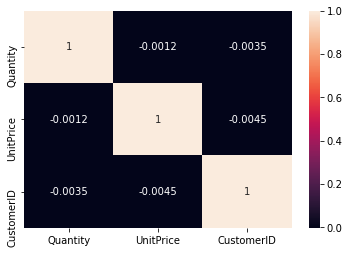

In [7]:
sns.heatmap(data.corr(),annot=True)